In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def newtons_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Find a root of the function f using Newton's method.

    Parameters:
    - f: function for which to find the root.
    - df: derivative of f.
    - x0: initial guess.
    - tol: tolerance for stopping criterion.
    - max_iter: maximum number of iterations.

    Returns:
    - Approximate root of f.
    """
    x = x0
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(df(x)) < tol:
            raise ValueError("Derivative too small.")
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError(f"Newton's method did not converge after {max_iter} iterations.")


In [14]:
def forward_euler(f, y0, t0, h, N):
    """
    Solve an ODE using the forward Euler method.

    Parameters:
    - f: function representing the ODE dy/dt = f(t, y).
    - y0: initial condition.
    - t0: initial time.
    - h: step size.
    - N: number of steps.

    Returns:
    - List of solution values.
    """
    y = y0
    t = t0
    solution = [y0]

    for _ in range(N):
        y = y + h * f(t, y)
        solution.append(y)
        t += h


    return solution

In [15]:
def backward_euler(f, dfy, y0, t0, h, N):
    """
    Solve an ODE using the backward Euler method.

    Parameters:
    - f: function representing the ODE dy/dt = f(t, y).
    - dfy: partial derivative of f with respect to y.
    - y0: initial condition.
    - t0: initial time.
    - h: step size.
    - N: number of steps.

    Returns:
    - List of solution values.
    """
    y = y0
    t = t0
    solution = [y0]

    for _ in range(N):
        # Define g and its derivative for Newton's method
        g = lambda y_new: y_new - y - h * f(t + h, y_new)
        dg = lambda y_new: 1 - h * dfy(t + h, y_new)

        # Use Newton's method to solve for y_new
        y = newtons_method(g, dg, y)
        solution.append(y)
        t += h

    return solution


In [16]:
def f_1(u, t): return u
def f_2(u, t): return -5 * u
def f_3(u, t): return (u - t)/(u + t)
def dfy_2(t, u): return -5 

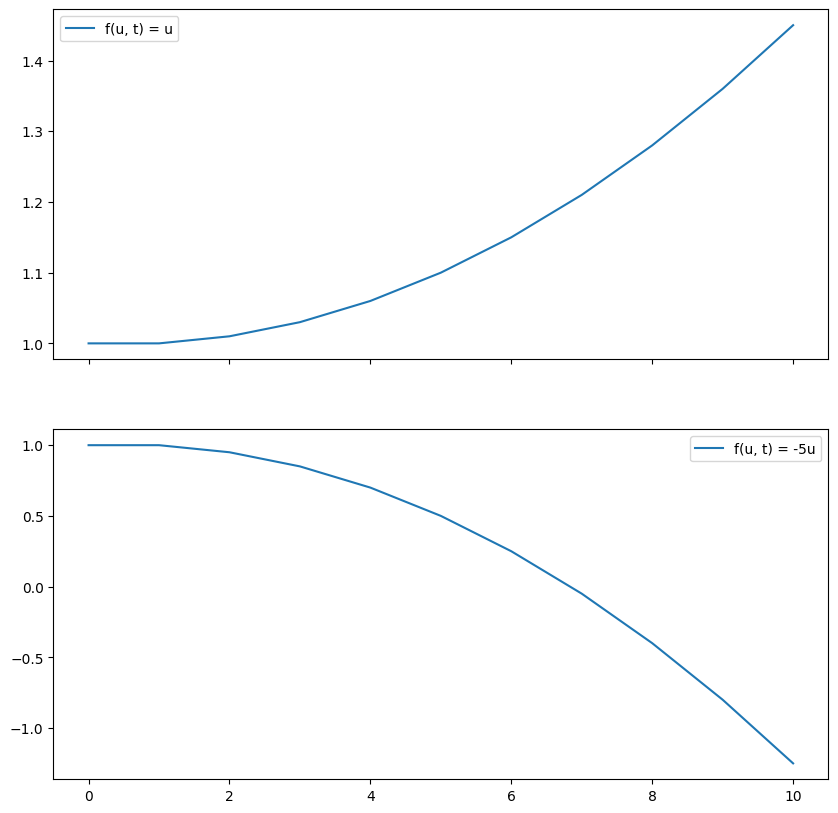

In [29]:
# euler avançado 1
solution_1 = forward_euler(f_1, y0=1, t0=0, h=0.1, N=10)
solution_2 = forward_euler(f_2, y0=1, t0=0, h=0.1, N=10)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
ax1.plot(solution_1, label='f(u, t) = u')
ax1.legend()
ax2.plot(solution_2, label='f(u, t) = -5u')
ax2.legend();

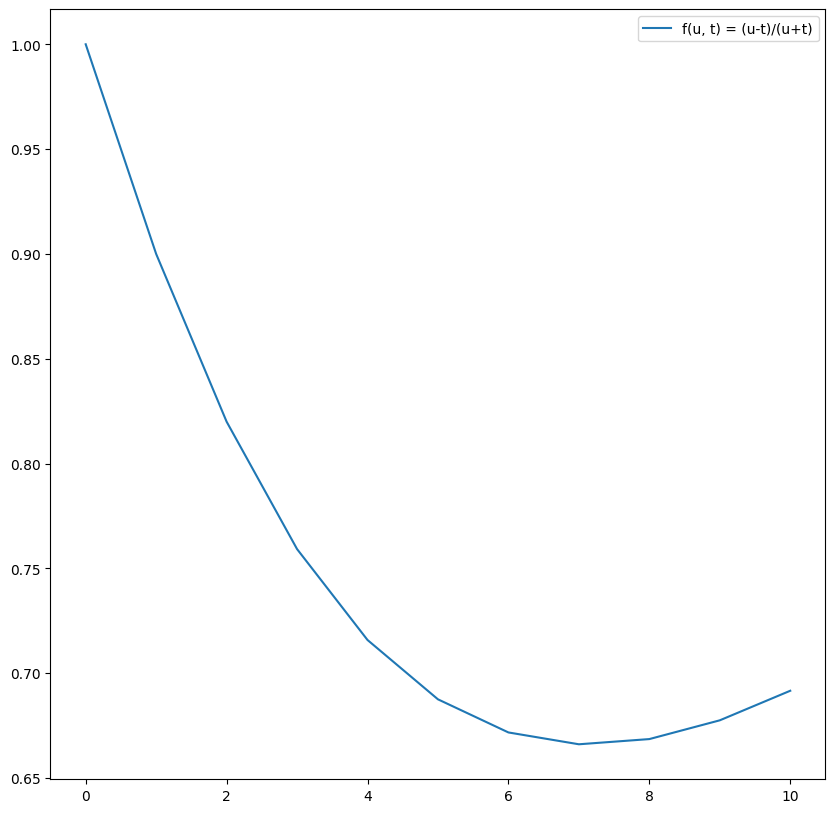

In [30]:
# euler avançado 2
solution_3 = forward_euler(f_3, y0=1, t0=0, h=0.1, N=10)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(solution_3, label='f(u, t) = (u-t)/(u+t)')
ax.legend();

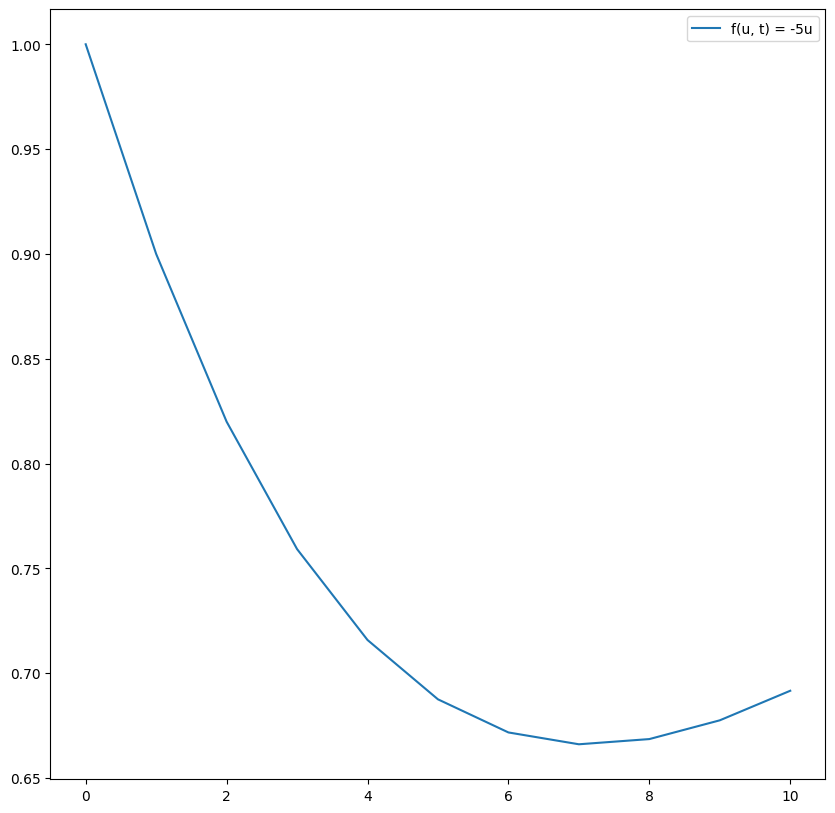

In [32]:
# euler atrasado 

solution_4  = backward_euler(f_2, dfy=dfy_2, y0=1, t0=0, h=0.1, N=10)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(solution_3, label='f(u, t) = -5u')
ax.legend();
